In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [22]:
# Step 2: Load the dataset
dataset_path = "/content/titanic.csv"  # Replace with the actual path to your dataset
df = pd.read_csv(dataset_path)  

<Axes: >

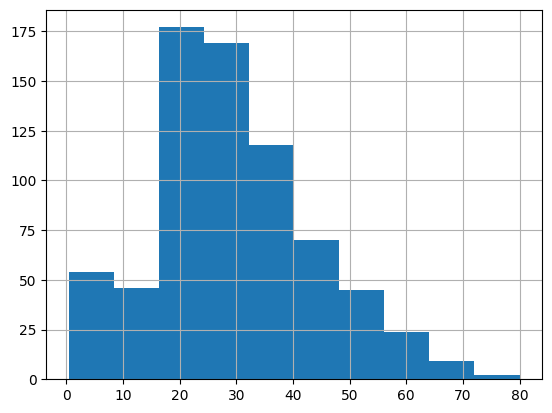

In [23]:
# Step 3: Perform Visualizations
# Univariate Analysis
# Example: Histogram for age
df['age'].hist()

age    0.42  0.67   0.75  0.83  0.92   1.00             2.00        3.00   \
sex     male  male female  male  male female      male female male female   
pclass                                                                      
1        NaN   NaN    NaN   NaN   1.0    NaN       NaN   0.00  NaN    NaN   
2        NaN   1.0    NaN   1.0   NaN    NaN  1.000000   1.00  1.0    1.0   
3        1.0   NaN    1.0   NaN   NaN    1.0  0.333333   0.25  0.0    0.0   

age     ... 62.00  63.00 64.00 65.00 66.00 70.00 70.50 71.00 74.00 80.00  
sex     ...  male female  male  male  male  male  male  male  male  male  
pclass  ...                                                               
1       ...   0.0    1.0   0.0   0.0   NaN   0.0   NaN   0.0   NaN   1.0  
2       ...   1.0    NaN   NaN   NaN   0.0   0.0   NaN   NaN   NaN   NaN  
3       ...   NaN    1.0   NaN   0.0   NaN   NaN   0.0   NaN   0.0   NaN  

[3 rows x 145 columns]

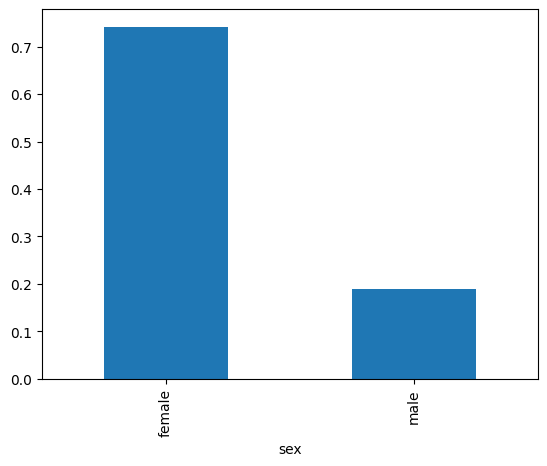

In [24]:
# Bi-Variate Analysis
# Example: Survival rate based on gender
df.groupby('sex')['survived'].mean().plot(kind='bar')

# Multi-Variate Analysis
# Example: Survival rate based on passenger class, age, and gender
df.pivot_table(index='pclass', columns=['age', 'sex'], values='survived', aggfunc='mean')

In [25]:
# Step 4: Perform descriptive statistics
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [26]:
# Step 5: Handle missing values
# Example: Remove rows with missing values
df.dropna(inplace=True)

In [27]:
from scipy.stats import mstats

threshold = 0.03  # Adjust the threshold as needed

# Apply Winsorization to replace outliers in the 'fare' column
df['fare'] = mstats.winsorize(df['fare'], limits=[0, threshold])

In [28]:
# Step 7: Encode categorical columns
# Example: One-hot encoding for the 'sex' column
df_encoded = pd.get_dummies(df, columns=['sex'])

In [ ]:
# Step 8: Split the data into dependent and independent variables
X = df_encoded.drop('survived', axis=1)  # Features
y = df_encoded['survived']  # Target variable

# Step 9: Convert string values to float and scale the independent variables
df['survived'] = [float(str(i).replace(",", "")) for i in df['survived']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# Step 10: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)